<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/section_%5B1_1%5D_Options_Market_Based_Valuation_Derivatives_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['font.family'] = 'serif'

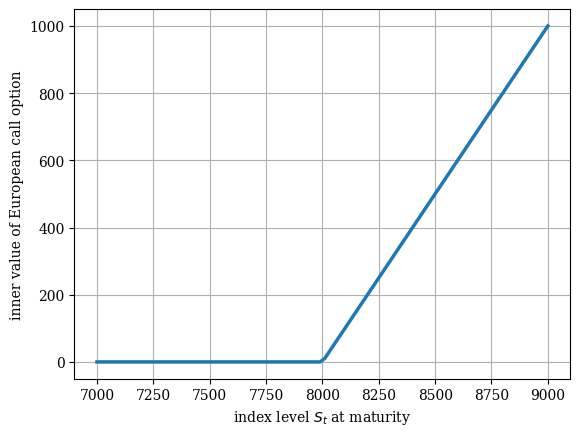

In [3]:
# Option Strike
K = 8000
# Graphical Output
S = np.linspace(7000, 9000, 100) # index level values
h = np.maximum(S - K, 0) # inner values of call option
plt.figure()
plt.plot(S, h, lw=2.5) # plot inner values at maturity
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)